In [1]:
import numpy as np
import os
import sys
sys.path.append('../')
import cv2
from utils import load_datasets
from copy import deepcopy
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from keras.api.models import Model
from keras.api.layers import Dense, Conv2D, BatchNormalization, LeakyReLU, Flatten, Softmax, Activation, MaxPool2D, Input, Dropout
from keras.api.optimizers import Adam
from keras.api.losses import binary_crossentropy
from keras.api.utils import to_categorical

In [2]:
ds01_train, ds01_val, ds02 = load_datasets(
    datasets_dir='../datasets/Movies',
    multi_class=False,
    read_from_stubs=False,
    stub_path='../datasets/stub_bin',
    save_stub=False
)

In [42]:
print(ds01_train.shape)

(800, 270, 460, 3)


In [45]:
cv2.imshow('', ds02[10])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
y_train = np.zeros(ds01_train.shape[0])
y_train[ds01_train.shape[0]//2:] = 1
y_train = to_categorical(y_train.reshape((-1,1)))

In [47]:
y_val = np.zeros(ds01_val.shape[0])
y_val[ds01_val.shape[0]//2:] = 1
y_val = to_categorical(y_val.reshape((-1,1)))

In [48]:
y_test = np.zeros(ds02.shape[0])
y_val[ds02.shape[0]//2:] = 1
y_test = to_categorical(y_test.reshape((-1,1)))

In [49]:
x_train , y_train = shuffle(ds01_train, y_train)
x_val , y_val = shuffle(ds01_val, y_val)
x_test , y_test = shuffle(ds02, y_test)


In [52]:
print(y_train)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [50]:
print(x_train.shape)

(800, 270, 460, 3)


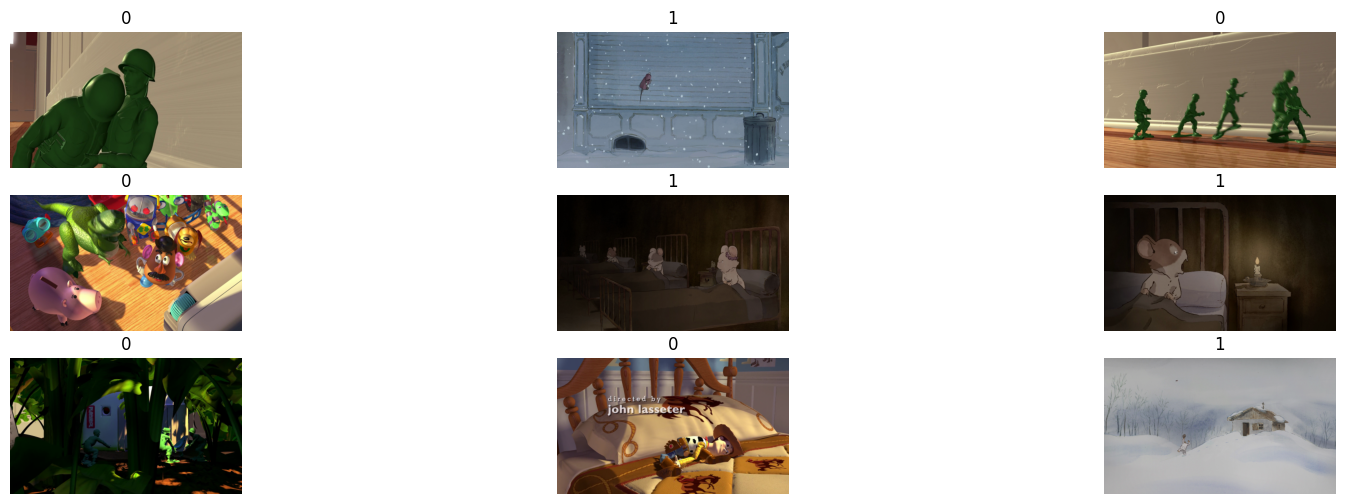

In [54]:
ind = np.random.permutation(x_train.shape[0])
plt.figure(figsize=(20,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i, :, :, ::-1]), plt.title(f'{int(y_train[i][0])}'), plt.axis('off')

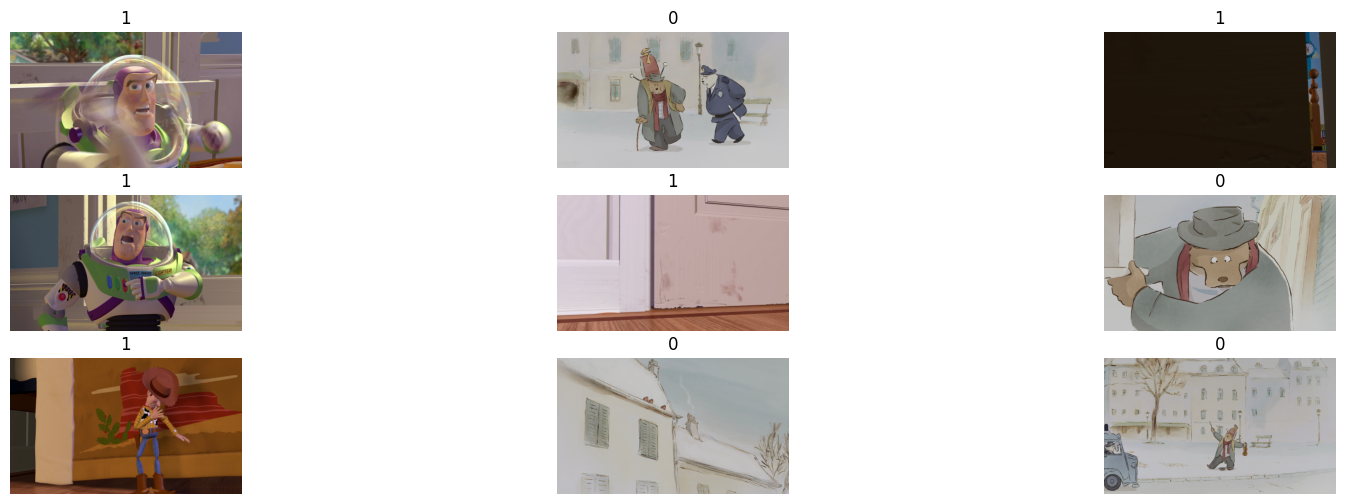

In [33]:
ind = np.random.permutation(x_val.shape[0])
plt.figure(figsize=(20,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_val[i, :, :, ::-1]), plt.title(f'{int(y_val[i][0])}'), plt.axis('off')

In [58]:
input = Input((270, 460, 3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPool2D()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPool2D()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(2)(x)
output = Activation('softmax')(x)

model_bin = Model(input, output)

In [59]:
model_bin.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 270, 460, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 270, 460, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 270, 460, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 270, 460, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 135, 230, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 135, 230, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 135, 230, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 135, 230, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 67, 115, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 493120)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    63,119,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,140,034 (240.86 MB)

 Trainable params: 63,139,586 (240.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [60]:
opt = Adam(learning_rate=0.005)
model_bin.compile(optimizer=opt, loss=binary_crossentropy, metrics=['accuracy'])

In [61]:
history = model_bin.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=15,
    validation_data=(x_val, y_val),
    shuffle=True
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.8543 - loss: 0.4213 - val_accuracy: 0.5000 - val_loss: 0.8292
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.9480 - loss: 0.1656 - val_accuracy: 0.5000 - val_loss: 1.5811
Epoch 3/15
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1:03 3s/step - accuracy: 0.9062 - loss: 0.1730

KeyboardInterrupt: 

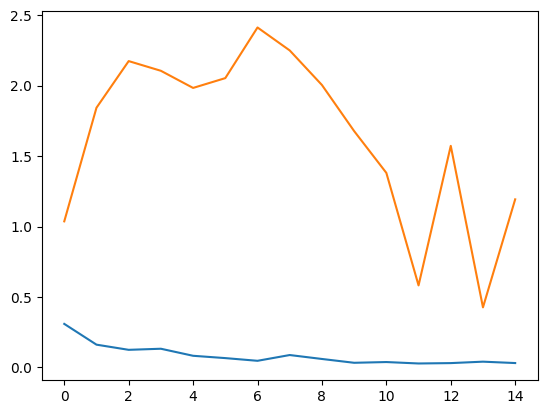

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

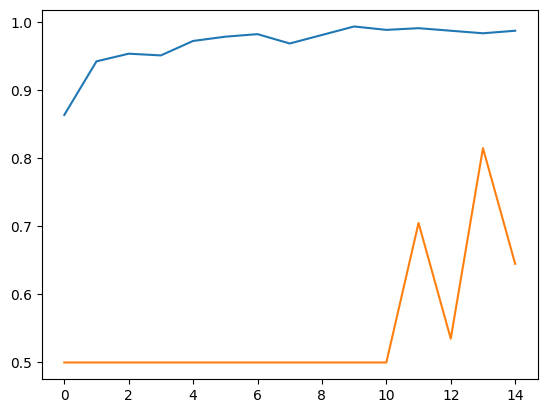

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [8]:
cv2.imshow('', ds01_train[399])
cv2.waitKey(0)
cv2.destroyAllWindows()